# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic

In [2]:
url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv'
titanic=pd.read_csv(url)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Step 4. Set PassengerId as the index

In [4]:
titanic.set_index('PassengerId', inplace=True)

In [5]:
titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [33]:
df = titanic[['Sex']]
df = df.assign(Count = 1)

df_mf = df.groupby('Sex').sum()

df_mf  # AGGREGATE THE DATA. THE INDEX IS USED AS THE LABEL.
       # THE SUM OF THE 1's FOR EACH LABEL APPLIES THE CORRECT PROPROTIONS TO
       # THE PIE

df_mf['share'] = df_mf.Count/df_mf.Count.sum()
df_mf

,Count,share
Sex,,
female,314,0.352413
male,577,0.647587


Sex
female    0.352413
male      0.647587
Name: Count, dtype: float64

Text(0.5, 1.0, 'Proportions of Males to Females on the Titanic')

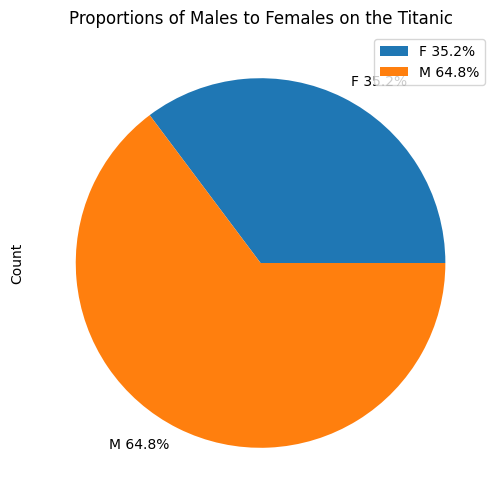

In [53]:
ax1 = df_mf.plot.pie(y='Count', labels=["F " + format(df_mf.share[0], "0.1%"), "M "+ format(df_mf.share[1], "0.1%")] , figsize=(6,6))
ax1.set_title("Proportions of Males to Females on the Titanic")

#ax1.text(0.5, 0.5, df_mf['male','share'], size=12)

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

In [54]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Fare'>

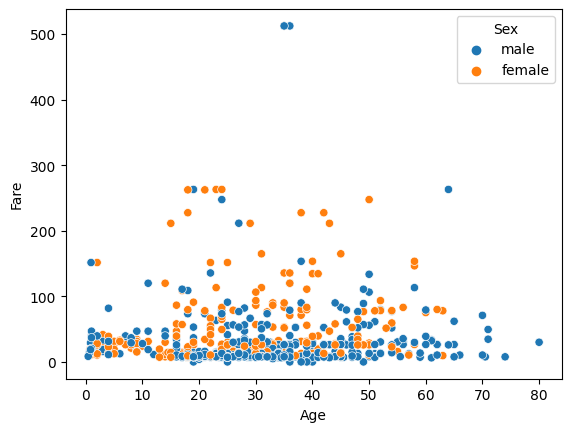

In [72]:
sns.scatterplot(data=titanic, x='Age', y='Fare', hue='Sex')

### Step 7. How many people survived?

In [73]:
titanic.Survived.sum()

342

In [77]:
titanic.groupby('Survived').Pclass.count()

Survived
0    549
1    342
Name: Pclass, dtype: int64

### Step 8. Create a histogram with the Fare payed

<Axes: xlabel='Fare', ylabel='Count'>

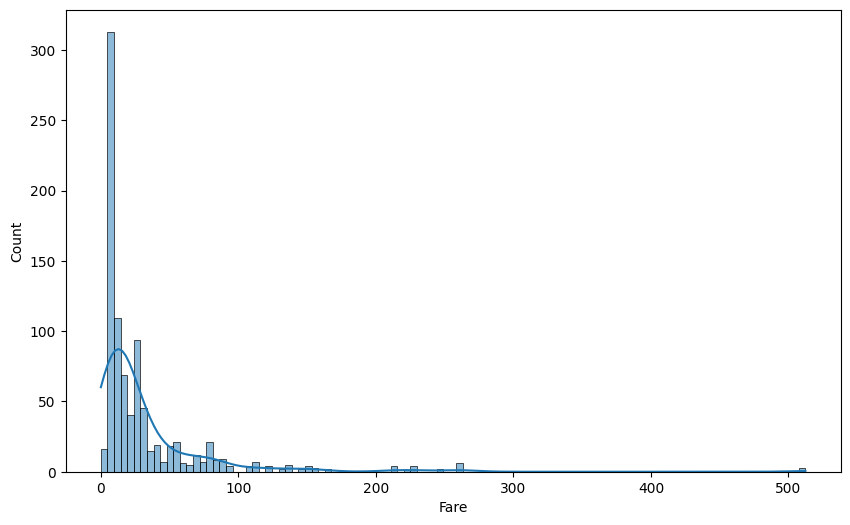

In [91]:
fix, ax = plt.subplots(figsize=(10,6))

sns.histplot(data=titanic, x='Fare', kde=True, ax=ax)


### BONUS: Create your own question and answer it.

Plot a bar chart of the fatality rate by age

Text(0.5, 1.0, 'Survival Rate of Passengers by Age')

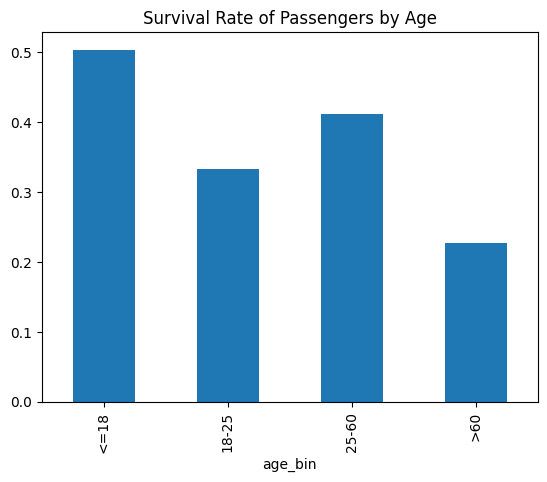

In [104]:
bins=[0,18, 25, 60, 120]
labels=('<=18', '18-25', '25-60', '>60')
titanic['age_bin'] = pd.cut(x=titanic['Age'], bins=bins, labels=labels)

ax = titanic.groupby('age_bin').Survived.mean().plot.bar()
ax.set_title("Survival Rate of Passengers by Age")